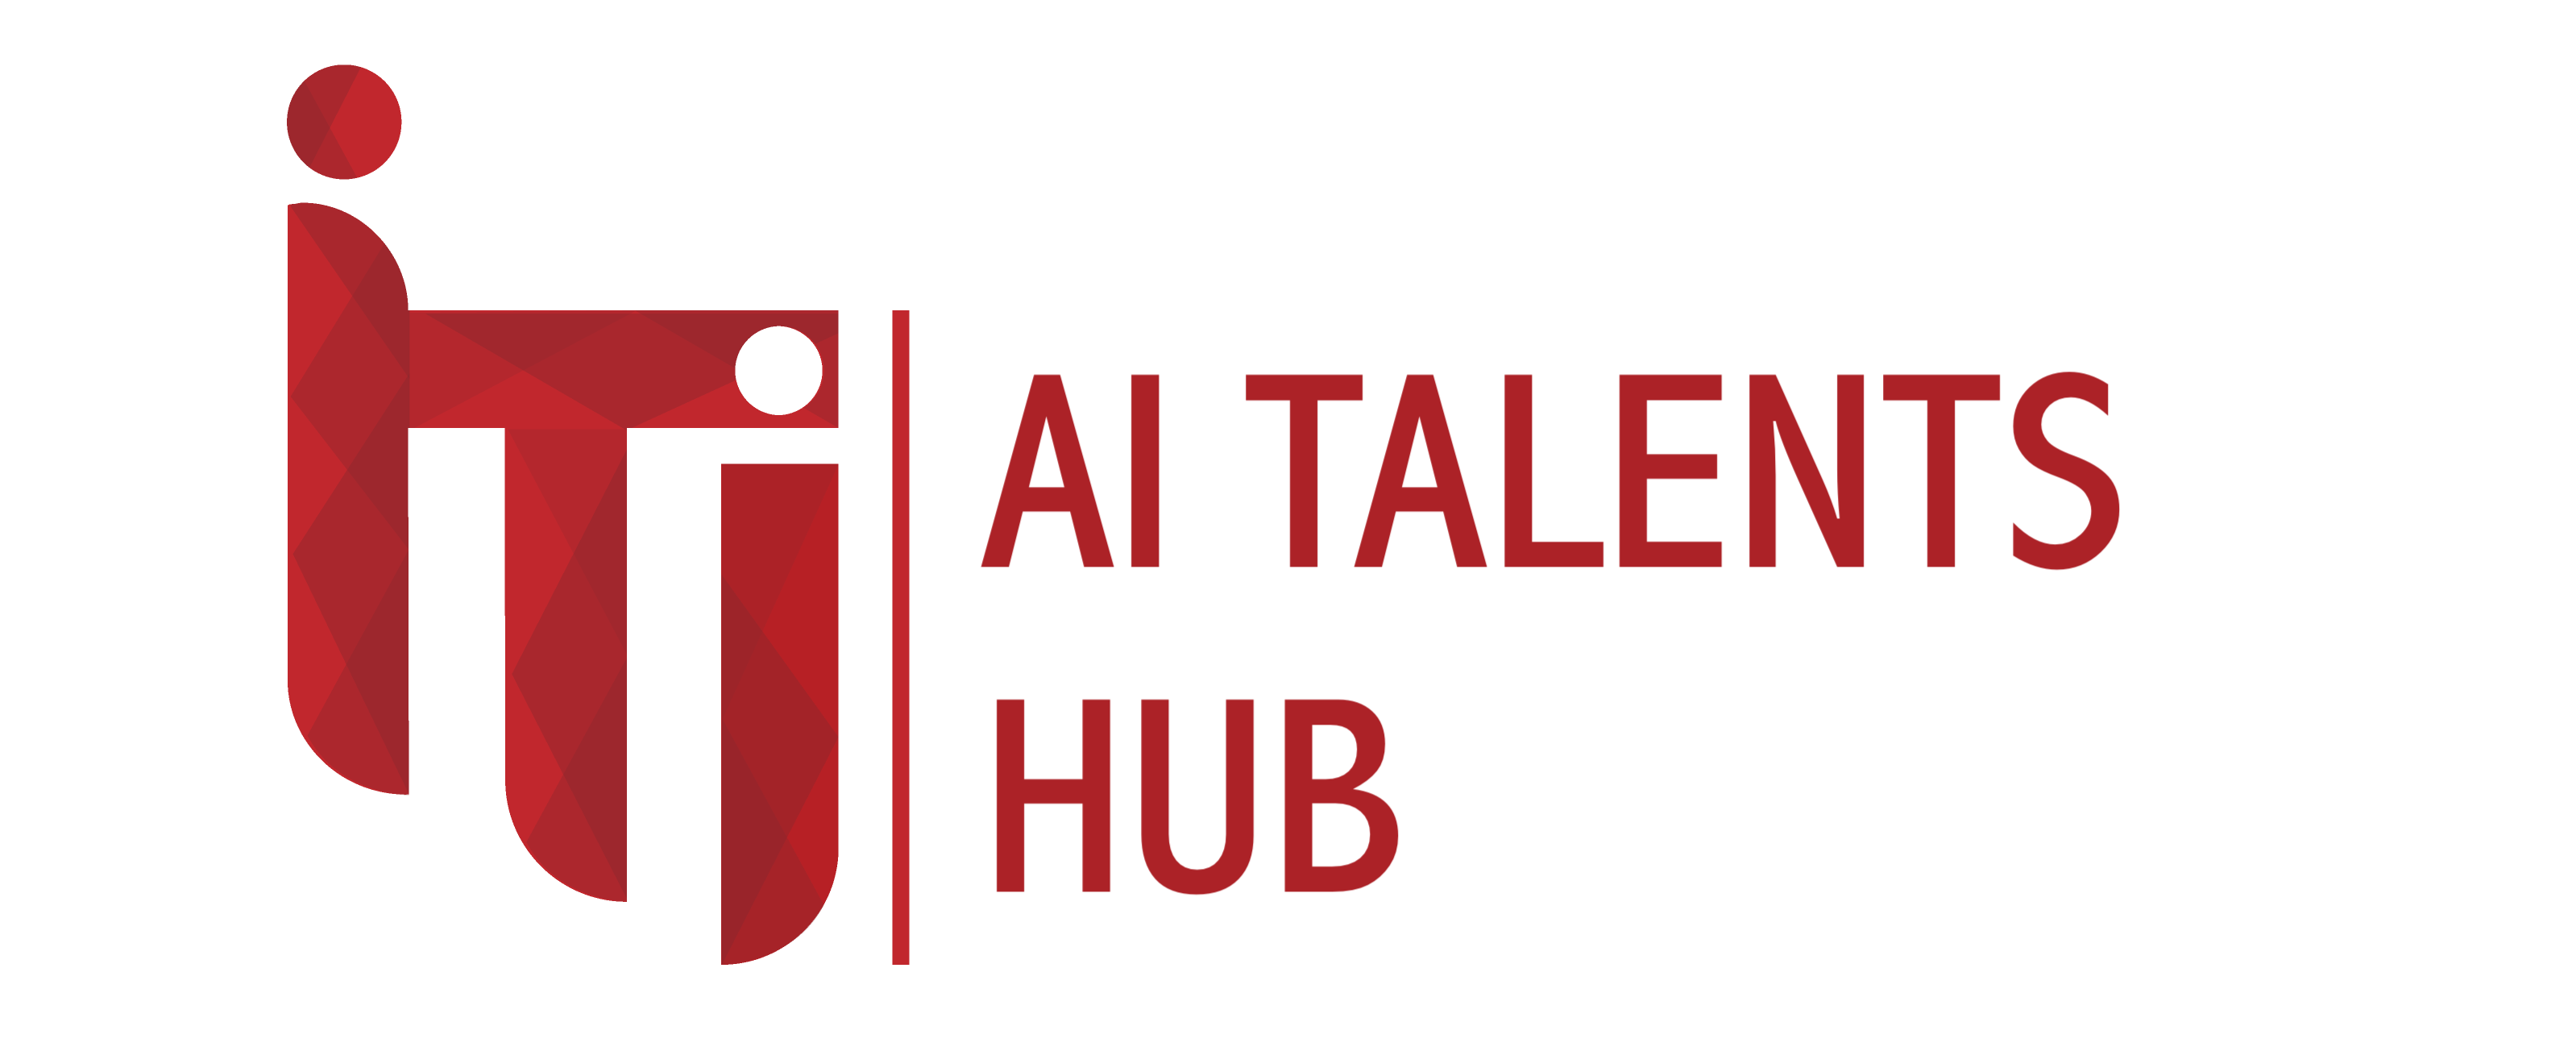

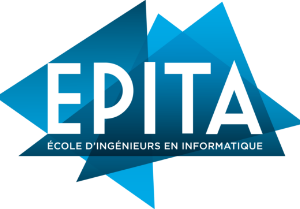

#  Pandas Group By operations on real-world data

In [2]:
import pandas as pd
path='Dataset/legislators-historical.csv'

In [3]:


dtypes = {
    "first_name": "category",
    "gender": "category",
    "type": "category",
    "state": "category",
    "party": "category",
}
df = pd.read_csv(
    path,
    dtype=dtypes,
    usecols=list(dtypes) + ["birthday", "last_name"],
    parse_dates=["birthday"]
)

In [4]:
 df.tail()

,last_name,first_name,birthday,gender,type,state,party
12044,Wright,Ron,1953-04-08,M,rep,TX,Republican
12045,Fudge,Marcia,1952-10-29,F,rep,OH,Democrat
12046,Haaland,Debra,1960-12-02,F,rep,NM,Democrat
12047,Hastings,Alcee,1936-09-05,M,rep,FL,Democrat
12048,Stivers,Steve,1965-03-24,M,rep,OH,Republican


In [5]:
df.dtypes

last_name             object
first_name          category
birthday      datetime64[ns]
gender              category
type                category
state               category
party               category
dtype: object

## The “Hello, World!” of Pandas GroupBy




```
SELECT state, count(name)
FROM df
GROUP BY state
ORDER BY state;
```



In [6]:
n_by_state = df.groupby("state")["last_name"].count()

In [7]:
n_by_state.head(10)

state
AK     16
AL    209
AR    117
AS      2
AZ     49
CA    367
CO     92
CT    240
DC      2
DE     97
Name: last_name, dtype: int64

In [8]:
df.groupby(["state", "gender"])["last_name"].count()

state  gender
AK     F           0
       M          16
AL     F           4
       M         205
AR     F           5
                ... 
WI     M         198
WV     F           1
       M         119
WY     F           1
       M          39
Name: last_name, Length: 116, dtype: int64


```
SELECT state, gender, count(name)
FROM df
GROUP BY state, gender
ORDER BY state, gender;
```



## Pandas GroupBy vs SQL


This is a good time to introduce one prominent difference between the Pandas GroupBy operation and the SQL query above. The result set of the SQL query contains three columns:

    state
    gender
    count
    
In the Pandas version, the grouped-on columns are pushed into the MultiIndex of the resulting Series by default:

In [9]:
n_by_state_gender = df.groupby(["state", "gender"])["last_name"].count()

In [11]:
n_by_state_gender

state  gender
AK     F           0
       M          16
AL     F           4
       M         205
AR     F           5
                ... 
WI     M         198
WV     F           1
       M         119
WY     F           1
       M          39
Name: last_name, Length: 116, dtype: int64

In [10]:
type(n_by_state_gender)

pandas.core.series.Series

In [ ]:
n_by_state_gender.index[:5]

MultiIndex([('AK', 'F'),
            ('AK', 'M'),
            ('AL', 'F'),
            ('AL', 'M'),
            ('AR', 'F')],
           names=['state', 'gender'])

In [ ]:
n_by_state_gender

state  gender
AK     F           0
       M          16
AL     F           4
       M         205
AR     F           5
                ... 
WI     M         198
WV     F           1
       M         119
WY     F           1
       M          39
Name: last_name, Length: 116, dtype: int64

In [ ]:
df.groupby(["state", "gender"], as_index=False)["last_name"].count()

,state,gender,last_name
0,AK,F,NaN
1,AK,M,16.0
2,AL,F,4.0
3,AL,M,205.0
4,AR,F,5.0
...,...,...,...
111,WI,M,198.0
112,WV,F,1.0
113,WV,M,119.0
114,WY,F,1.0


In [ ]:
df.groupby("state", sort=False)["last_name"].count()

state
DE      97
VA     433
SC     251
MD     305
PA    1053
MA     427
NJ     359
GA     317
NY    1467
NC     356
CT     240
VT     115
KY     373
RI     107
NH     181
TN     301
OH     676
MS     155
OL       2
IN     343
LA     199
IL     488
MO     334
AL     209
AR     117
ME     175
FL     161
MI     296
IA     205
WI     198
TX     263
CA     367
OR      90
MN     161
NM      57
NE     127
WA      96
KS     143
UT      55
NV      56
CO      92
WV     120
DK       9
AZ      49
ID      59
MT      53
WY      40
DC       2
ND      44
SD      51
OK      93
HI      24
PR      19
AK      16
PI      13
VI       4
GU       4
AS       2
Name: last_name, dtype: int64

In [ ]:
by_state = df.groupby("state")

In [ ]:
print(by_state)

In [ ]:
by_state.groups["PA"]

Int64Index([    4,    19,    21,    27,    38,    57,    69,    76,    84,
               88,
            ...
            11838, 11862, 11871, 11873, 11883, 11887, 11926, 11938, 11952,
            11965],
           dtype='int64', length=1053)

In [ ]:
by_state.get_group("PA")

,last_name,first_name,birthday,gender,type,state,party
4,Clymer,George,1739-03-16,M,rep,PA,NaN
19,Maclay,William,1737-07-20,M,sen,PA,Anti-Administration
21,Morris,Robert,1734-01-20,M,sen,PA,Pro-Administration
27,Wynkoop,Henry,1737-03-02,M,rep,PA,NaN
38,Jacobs,Israel,1726-06-09,M,rep,PA,NaN
...,...,...,...,...,...,...,...
11887,Brady,Robert,1945-04-07,M,rep,PA,Democrat
11926,Shuster,Bill,1961-01-10,M,rep,PA,Republican
11938,Rothfus,Keith,1962-04-25,M,rep,PA,Republican
11952,Costello,Ryan,1976-09-07,M,rep,PA,Republican


This is virtually equivalent to using .loc[]. You could get the same output with something like df.loc[df["state"] == "PA"].



In [ ]:
df.groupby("state")["last_name"].count()

state
AK      16
AL     209
AR     117
AS       2
AZ      49
CA     367
CO      92
CT     240
DC       2
DE      97
DK       9
FL     161
GA     317
GU       4
HI      24
IA     205
ID      59
IL     488
IN     343
KS     143
KY     373
LA     199
MA     427
MD     305
ME     175
MI     296
MN     161
MO     334
MS     155
MT      53
NC     356
ND      44
NE     127
NH     181
NJ     359
NM      57
NV      56
NY    1467
OH     676
OK      93
OL       2
OR      90
PA    1053
PI      13
PR      19
RI     107
SC     251
SD      51
TN     301
TX     263
UT      55
VA     433
VI       4
VT     115
WA      96
WI     198
WV     120
WY      40
Name: last_name, dtype: int64

NameError: ignored

In [ ]:
state, frame = next(iter(by_state))  # First tuple from iterator

In [ ]:
state

'AK'

In [ ]:
df.groupby("state")["last_name"].count()

state
AK      16
AL     209
AR     117
AS       2
AZ      49
CA     367
CO      92
CT     240
DC       2
DE      97
DK       9
FL     161
GA     317
GU       4
HI      24
IA     205
ID      59
IL     488
IN     343
KS     143
KY     373
LA     199
MA     427
MD     305
ME     175
MI     296
MN     161
MO     334
MS     155
MT      53
NC     356
ND      44
NE     127
NH     181
NJ     359
NM      57
NV      56
NY    1467
OH     676
OK      93
OL       2
OR      90
PA    1053
PI      13
PR      19
RI     107
SC     251
SD      51
TN     301
TX     263
UT      55
VA     433
VI       4
VT     115
WA      96
WI     198
WV     120
WY      40
Name: last_name, dtype: int64

In [ ]:
frame["last_name"].count()  # Count for state == 'AK'

16

# Split-apply-combine chain of operations works



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
df = pd.read_excel('/content/netflix.xlsx')
df.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   rating             1000 non-null   object 
 2   ratingLevel        941 non-null    object 
 3   ratingDescription  1000 non-null   int64  
 4   release year       1000 non-null   int64  
 5   user rating score  605 non-null    float64
 6   user rating size   1000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


You can drop rows that have any missing values, drop any duplicate rows and build a pairplot of the DataFrame using seaborn in order to get a visual sense of the data. You'll color the data by the 'rating' column. Check out the plots and see what information you can get from them.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

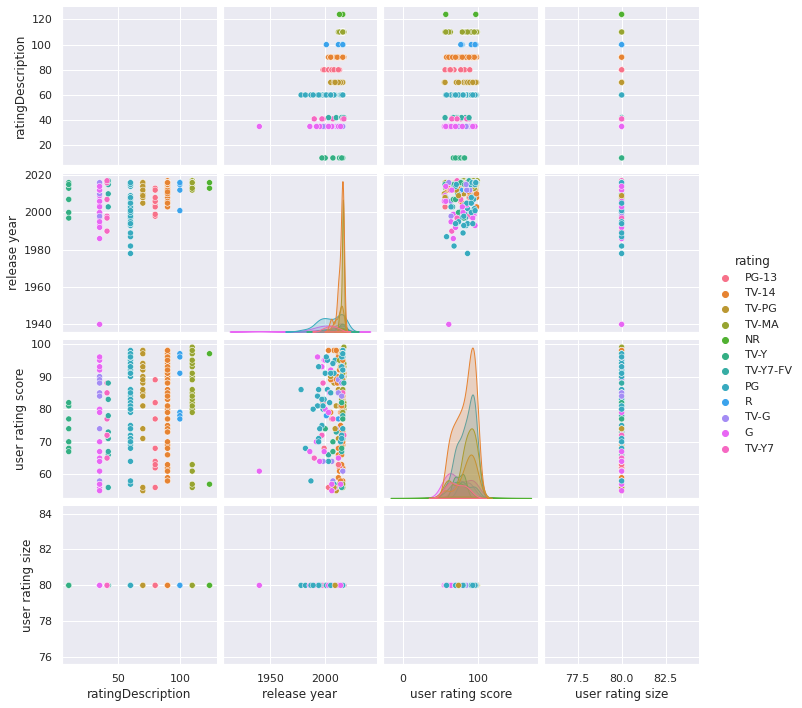

In [ ]:
# Drop rows with missing values and drop duplicate
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Visualize pairplot of df
sns.pairplot(df, hue='rating');

In [ ]:
df.describe()

,ratingDescription,release year,user rating score,user rating size
count,246.000000,246.000000,246.000000,246.0
mean,73.556911,2010.272358,81.390244,80.0
std,26.616145,8.887219,12.677883,0.0
min,10.000000,1940.000000,55.000000,80.0
25%,60.000000,2007.000000,71.000000,80.0
50%,80.000000,2015.000000,83.500000,80.0
75%,90.000000,2016.000000,92.750000,80.0
max,124.000000,2017.000000,99.000000,80.0


## Groupbys and split-apply-combine to answer the question



## Step 1. Split
Now that you've checked out out data, it's time for the fun part. You'll first use a groupby method to split the data into groups, where each group is the set of movies released in a given year. This is the split in split-apply-combine:

In [ ]:
df_by_year = df.groupby("release year")

In [ ]:
type(df_by_year)

pandas.core.groupby.generic.DataFrameGroupBy

In [ ]:
df_by_year

## Step 2. Apply

Such groupby objects are very useful. Remember that the .describe() method for a DataFrame returns summary statistics for numeric columns? Well, the .describe() method for DataFrameGroupBy objects returns summary statistics for each numeric column, but computed for each group in the split. In your case, it's for each release_year. This is an example of the apply in split-apply-combine: you're applying the .describe() method to each group in the groupby. Do this and print the first 5 rows of the result:




In [ ]:
# Summary stats over years
df_by_year.describe().head()

ratingDescription                  ... user rating size                  
                         count  mean std   min  ...              25%   50%   75%   max
release year                                    ...                                   
1940                       1.0  35.0 NaN  35.0  ...             80.0  80.0  80.0  80.0
1978                       1.0  60.0 NaN  60.0  ...             80.0  80.0  80.0  80.0
1982                       1.0  60.0 NaN  60.0  ...             80.0  80.0  80.0  80.0
1986                       1.0  35.0 NaN  35.0  ...             80.0  80.0  80.0  80.0
1987                       1.0  60.0 NaN  60.0  ...             80.0  80.0  80.0  80.0

[5 rows x 24 columns]

In [ ]:
list(df_by_year)[10]

(1995,             title rating  ... user rating score  user rating size
 766         Balto      G  ...              64.0                80
 967  Heavyweights     PG  ...              74.0                80
 
 [2 rows x 7 columns])

## Step 3. Combine
Let's say that you wanted the mean or median user_rating_score for each year. Then you can apply the .mean() or .median() method, respectively, to the groupby object and 'combine' these into a new DataFrame.

In [ ]:
# Get median values by year and print first 5 rows
df_med_by_year = df_by_year.median()
df_med_by_year.head()

,ratingDescription,user rating score,user rating size
release year,,,
1940,35.0,61.0,80.0
1978,60.0,86.0,80.0
1982,60.0,68.0,80.0
1986,35.0,67.0,80.0
1987,60.0,58.0,80.0


In [ ]:
print(df.index)

Int64Index([  0,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            908, 911, 917, 931, 962, 966, 967, 972, 973, 979],
           dtype='int64', length=246)


In [ ]:
print(df_med_by_year.index)

Int64Index([1940, 1978, 1982, 1986, 1987, 1989, 1990, 1992, 1993, 1994, 1995,
            1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
            2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
           dtype='int64', name='release year')


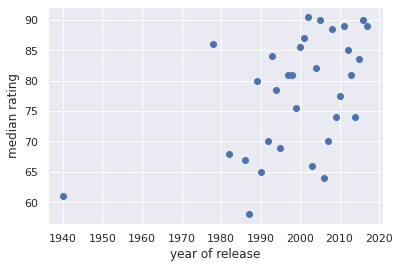

In [ ]:
df_rat_by_year = df_med_by_year['user rating score']
plt.scatter(df_rat_by_year.index, df_rat_by_year)
plt.xlabel('year of release')
plt.ylabel('median rating');

#  Concatenate for combining DataFrames across rows or columns

## Combining Data in Pandas With merge(), .join(), and concat()


Pandas’ Series and DataFrame objects are powerful tools for exploring and analyzing data. Part of their power comes from a multifaceted approach to combining separate datasets. With Pandas, you can merge, join, and concatenate your datasets, allowing you to unify and better understand your data as you analyze it.

In this tutorial, you’ll learn how and when to combine your data in Pandas with:

    merge() for combining data on common columns or indices
    .join() for combining data on a key column or an index
    concat() for combining DataFrames across rows or columns

## Pandas merge(): Combining Data on Common Columns or Indices


You can achieve both many-to-one and many-to-many joins with merge(). In a many-to-one join, one of your datasets will have many rows in the merge column that repeat the same values (such as 1, 1, 3, 5, 5), while the merge column in the other dataset will not have repeat values (such as 1, 3, 5).

When you use merge(), you’ll provide two required arguments:

    The left DataFrame
    The right DataFrame

How to merge()
Before getting into the details of how to use merge(), you should first understand the various forms of joins:

    inner
    outer
    left
    right

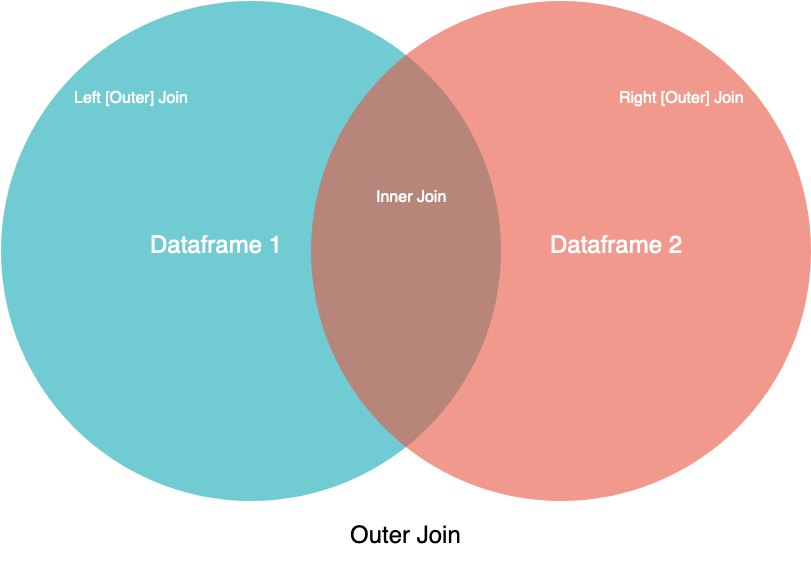

##Inner Join


 you will lose rows that don’t have a match in the other DataFrame’s key column.

In [12]:
import pandas as pd
climate_temp = pd.read_csv("Dataset/climate_temp.csv")
climate_precip = pd.read_csv("Dataset/climate_precip.csv")

In [13]:
climate_temp.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,...,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,...,0,0,0,-7777,1,2,6,7,10,15
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,...,0,0,0,-7777,1,2,6,7,10,15
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,...,0,0,0,-7777,1,2,5,7,10,15
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,...,0,0,0,-7777,1,2,5,7,10,15
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,...,0,0,0,-7777,-7777,2,5,7,10,15


In [ ]:
climate_temp.shape

(8794, 21)

In [ ]:
climate_precip.shape

(6493, 29)

In [ ]:
precip_one_station = climate_precip[climate_precip["STATION"] == "GHCND:USC00045721"]

In [ ]:
precip_one_station.head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
1460,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,-666.0,-66.6,0.04,0.0,0.04,0.0,137.0,81.0,31.0,11.0,4.0,0.0,3.0,3.0,9.0,6.0,0.0,-9999.0,-9999.0
1461,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,-666.0,-66.6,0.08,0.0,0.08,0.0,138.0,83.0,31.0,11.0,4.0,0.0,3.0,3.0,10.0,6.0,0.0,-9999.0,-9999.0
1462,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666.0,-66.6,0.12,0.0,0.12,0.0,139.0,84.0,31.0,11.0,4.0,0.0,3.0,3.0,10.0,6.0,0.0,-9999.0,-9999.0
1463,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666.0,-66.6,0.16,0.0,0.16,0.0,140.0,85.0,32.0,11.0,4.0,0.0,3.0,2.0,10.0,6.0,0.0,-9999.0,-9999.0
1464,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,-666.0,-66.6,0.21,0.0,0.21,0.0,141.0,86.0,32.0,11.0,4.0,0.0,3.0,2.0,10.0,6.0,0.0,-9999.0,-9999.0


In [ ]:
inner_merged = pd.merge(precip_one_station, climate_temp)

In [ ]:
inner_merged.head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI,ELEVATION,LATITUDE,LONGITUDE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,-666.0,-66.6,0.04,0.0,0.04,0.0,137.0,81.0,31.0,11.0,4.0,0.0,3.0,3.0,9.0,6.0,0.0,-9999.0,-9999.0,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777.0,0.0,0.0,0.0,1.0,3.0,6.0,10.0,12.0,14.0,19.0
1,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,-666.0,-66.6,0.08,0.0,0.08,0.0,138.0,83.0,31.0,11.0,4.0,0.0,3.0,3.0,10.0,6.0,0.0,-9999.0,-9999.0,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777.0,0.0,0.0,0.0,1.0,3.0,6.0,10.0,11.0,14.0,19.0
2,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666.0,-66.6,0.12,0.0,0.12,0.0,139.0,84.0,31.0,11.0,4.0,0.0,3.0,3.0,10.0,6.0,0.0,-9999.0,-9999.0,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777.0,0.0,0.0,0.0,1.0,2.0,5.0,9.0,11.0,14.0,19.0
3,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666.0,-66.6,0.16,0.0,0.16,0.0,140.0,85.0,32.0,11.0,4.0,0.0,3.0,2.0,10.0,6.0,0.0,-9999.0,-9999.0,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777.0,0.0,0.0,0.0,1.0,2.0,5.0,9.0,11.0,14.0,19.0
4,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,-666.0,-66.6,0.21,0.0,0.21,0.0,141.0,86.0,32.0,11.0,4.0,0.0,3.0,2.0,10.0,6.0,0.0,-9999.0,-9999.0,1325.9,34.9436,-115.5469,3,1,-7777,-7777,-7777.0,0.0,0.0,0.0,1.0,2.0,5.0,9.0,11.0,14.0,19.0


In [ ]:
inner_merged.shape

(365, 47)

In [ ]:
inner_merged_total = pd.merge(climate_temp, climate_precip, on=["STATION", "DATE"])
inner_merged_total.head()
inner_merged_total.shape

(5840, 48)

## Outer Join


all rows from both DataFrames will be present in the new DataFrame

If a row doesn’t have a match in the other DataFrame (based on the key column[s]), then you won’t lose the row like you would with an inner join. Instead, the row will be in the merged DataFrame with NaN values filled in where appropriate.



In [ ]:
outer_merged = pd.merge(precip_one_station, climate_temp, how="outer", on=["STATION", "DATE"])
outer_merged.head()
outer_merged.shape

(8794, 48)

## Left Join
you’ll specify a left join—also known as a left outer join—with the how parameter. Using a left outer join will leave your new merged DataFrame with all rows from the left DataFrame, while discarding rows from the right DataFrame that don’t have a match in the key column of the left DataFrame.


In [ ]:
left_merged = pd.merge(climate_temp, precip_one_station,
                        how="left", on=["STATION", "DATE"])
left_merged.head()
left_merged.shape

(8794, 48)

In [ ]:
left_merged_reversed = pd.merge(precip_one_station, climate_temp, how="left", on=["STATION", "DATE"])
left_merged_reversed.head()
left_merged_reversed.shape

(365, 48)

## Right Join
The right join (or right outer join) is the mirror-image version of the left join. With this join, all rows from the right DataFrame will be retained, while rows in the left DataFrame without a match in the key column of the right DataFrame will be discarded.



In [ ]:
right_merged = pd.merge(precip_one_station, climate_temp, how="right", on=["STATION", "DATE"])
right_merged.head()
right_merged.shape

(8794, 48)

## Pandas .join(): Combining Data on a Column or Index


In [ ]:
precip_one_station.join(climate_temp, lsuffix="_left", rsuffix="_right")


,STATION_left,STATION_NAME_left,DATE_left,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI,STATION_right,STATION_NAME_right,ELEVATION,LATITUDE,LONGITUDE,DATE_right,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
1460,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,-666.0,-66.6,0.04,0.0,0.04,0.0,137.0,81.0,31.0,11.0,4.0,0.0,3.0,3.0,9.0,6.0,0.0,-9999.0,-9999.0,GHCND:USC00045721,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,20100101,3,1,-7777,-7777,-7777.0,0.0,0.0,0.0,1.0,3.0,6.0,10.0,12.0,14.0,19.0
1461,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,-666.0,-66.6,0.08,0.0,0.08,0.0,138.0,83.0,31.0,11.0,4.0,0.0,3.0,3.0,10.0,6.0,0.0,-9999.0,-9999.0,GHCND:USC00045721,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,20100102,3,1,-7777,-7777,-7777.0,0.0,0.0,0.0,1.0,3.0,6.0,10.0,11.0,14.0,19.0
1462,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666.0,-66.6,0.12,0.0,0.12,0.0,139.0,84.0,31.0,11.0,4.0,0.0,3.0,3.0,10.0,6.0,0.0,-9999.0,-9999.0,GHCND:USC00045721,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,20100103,3,1,-7777,-7777,-7777.0,0.0,0.0,0.0,1.0,2.0,5.0,9.0,11.0,14.0,19.0
1463,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666.0,-66.6,0.16,0.0,0.16,0.0,140.0,85.0,32.0,11.0,4.0,0.0,3.0,2.0,10.0,6.0,0.0,-9999.0,-9999.0,GHCND:USC00045721,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,20100104,3,1,-7777,-7777,-7777.0,0.0,0.0,0.0,1.0,2.0,5.0,9.0,11.0,14.0,19.0
1464,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,-666.0,-66.6,0.21,0.0,0.21,0.0,141.0,86.0,32.0,11.0,4.0,0.0,3.0,2.0,10.0,6.0,0.0,-9999.0,-9999.0,GHCND:USC00045721,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,20100105,3,1,-7777,-7777,-7777.0,0.0,0.0,0.0,1.0,2.0,5.0,9.0,11.0,14.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101227,0.04,-666,-66.6,0.15,-666,-66.6,0.44,-666.0,-66.6,1.14,0.3,11.29,1.5,132.0,76.0,30.0,12.0,4.0,0.0,3.0,3.0,9.0,6.0,0.0,2.0,2.0,GHCND:USC00045721,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,20101227,3,1,-7777,-7777,-7777.0,-7777.0,0.0,0.0,1.0,3.0,6.0,10.0,12.0,15.0,20.0
1821,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101228,0.04,-666,-66.6,0.15,-666,-66.6,0.43,-666.0,-66.6,1.19,0.3,11.34,1.5,133.0,77.0,30.0,12.0,4.0,0.0,3.0,3.0,9.0,6.0,0.0,2.0,2.0,GHCND:USC00045721,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,20101228,3,1,-7777,-7777,-7777.0,-7777.0,0.0,0.0,1.0,3.0,6.0,10.0,12.0,15.0,20.0
1822,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101229,0.04,-666,-66.6,0.15,-666,-66.6,0.43,-666.0,-66.6,1.24,0.3,11.39,1.5,133.0,78.0,30.0,11.0,4.0,0.0,3.0,3.0,9.0,6.0,0.0,2.0,2.0,GHCND:USC00045721,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,20101229,3,1,-7777,-7777,-7777.0,-7777.0,0.0,0.0,1.0,3.0,6.0,10.0,12.0,15.0,20.0
1823,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101230,0.04,-666,-66.6,0.15,-666,-66.6,0.43,-666.0,-66.6,1.30,0.3,11.45,1.5,134.0,79.0,30.0,11.0,4.0,0.0,3.0,3.0,9.0,6.0,0.0,2.0,2.0,GHCND:USC00045721,MITCHELL CAVERNS CA US,1325.9,34.9436,-115.5469,20101230,3,1,-7777,-7777,-7777.0,-

Like merge(), .join() has a few parameters that give you more flexibility in your joins. However, with .join(), the list of parameters is relatively short:

    other: This is the only required parameter. It defines the other DataFrame to join. You can also specify a list of DataFrames here, allowing you to combine a number of datasets in a single .join() call.

    on: This parameter specifies an optional column or index name for the left DataFrame (climate_temp in the previous example) to join the other DataFrame’s index. If it’s set to None, which is the default, then the join will be index-on-index.

    how: This has the same options as how from merge(). The difference is that it is index-based unless you also specify columns with on.

    lsuffix and rsuffix: These are similar to suffixes in merge(). They specify a suffix to add to any overlapping columns but have no effect when passing a list of other DataFrames.

    sort: Enable this to sort the resulting DataFrame by the join key.

In [ ]:
inner_merged_total = pd.merge(climate_temp, climate_precip, on=["STATION", "DATE"])
inner_merged_total.head()
inner_joined_total = climate_temp.join(
    climate_precip.set_index(["STATION", "DATE"]),
    lsuffix="_x",
    rsuffix="_y",
    on=["STATION", "DATE"],
)
inner_joined_total.head()

,STATION,STATION_NAME_x,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL,STATION_NAME_y,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602.0,34.12806,-116.03694,20100101,6,2,-7777,-7777,-7777.0,0.0,0.0,0.0,-7777.0,1.0,2.0,6.0,7.0,10.0,15.0,TWENTYNINE PALMS CA US,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,0.02,0.0,0.02,0.0,98.0,43.0,12.0,3.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602.0,34.12806,-116.03694,20100102,6,2,1,-7777,-7777.0,0.0,0.0,0.0,-7777.0,1.0,2.0,6.0,7.0,10.0,15.0,TWENTYNINE PALMS CA US,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,0.04,0.0,0.04,0.0,99.0,44.0,12.0,3.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602.0,34.12806,-116.03694,20100103,6,2,1,-7777,-7777.0,0.0,0.0,0.0,-7777.0,1.0,2.0,5.0,7.0,10.0,15.0,TWENTYNINE PALMS CA US,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,0.05,0.0,0.05,0.0,100.0,44.0,12.0,3.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602.0,34.12806,-116.03694,20100104,6,2,1,-7777,-7777.0,0.0,0.0,0.0,-7777.0,1.0,2.0,5.0,7.0,10.0,15.0,TWENTYNINE PALMS CA US,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,0.07,0.0,0.07,0.0,101.0,45.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602.0,34.12806,-116.03694,20100105,6,2,1,-7777,-7777.0,0.0,0.0,0.0,-7777.0,-7777.0,2.0,5.0,7.0,10.0,15.0,TWENTYNINE PALMS CA US,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,0.09,0.0,0.09,0.0,102.0,45.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Pandas concat(): Combining Data Across Rows or Columns


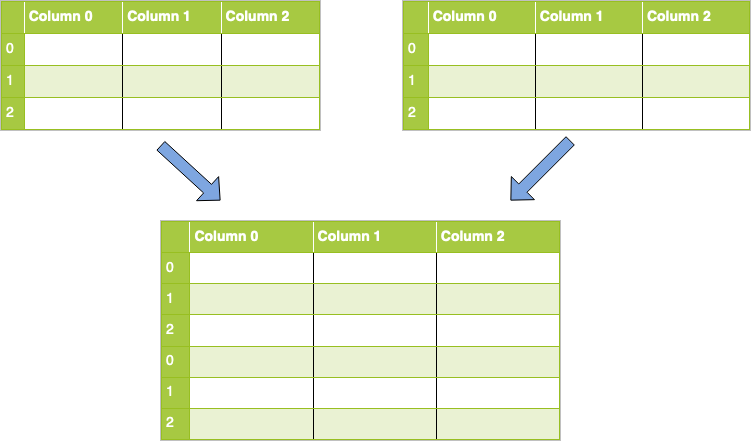

To implement this in code, you’ll use concat() and pass it a list of DataFrames that you want to concatenate. Code for this task would like like this:



In [ ]:
double_precip = pd.concat([precip_one_station, precip_one_station])
double_precip

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
1460,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,-666.0,-66.6,0.04,0.0,0.04,0.0,137.0,81.0,31.0,11.0,4.0,0.0,3.0,3.0,9.0,6.0,0.0,-9999.0,-9999.0
1461,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,-666.0,-66.6,0.08,0.0,0.08,0.0,138.0,83.0,31.0,11.0,4.0,0.0,3.0,3.0,10.0,6.0,0.0,-9999.0,-9999.0
1462,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666.0,-66.6,0.12,0.0,0.12,0.0,139.0,84.0,31.0,11.0,4.0,0.0,3.0,3.0,10.0,6.0,0.0,-9999.0,-9999.0
1463,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666.0,-66.6,0.16,0.0,0.16,0.0,140.0,85.0,32.0,11.0,4.0,0.0,3.0,2.0,10.0,6.0,0.0,-9999.0,-9999.0
1464,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,-666.0,-66.6,0.21,0.0,0.21,0.0,141.0,86.0,32.0,11.0,4.0,0.0,3.0,2.0,10.0,6.0,0.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101227,0.04,-666,-66.6,0.15,-666,-66.6,0.44,-666.0,-66.6,1.14,0.3,11.29,1.5,132.0,76.0,30.0,12.0,4.0,0.0,3.0,3.0,9.0,6.0,0.0,2.0,2.0
1821,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101228,0.04,-666,-66.6,0.15,-666,-66.6,0.43,-666.0,-66.6,1.19,0.3,11.34,1.5,133.0,77.0,30.0,12.0,4.0,0.0,3.0,3.0,9.0,6.0,0.0,2.0,2.0
1822,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101229,0.04,-666,-66.6,0.15,-666,-66.6,0.43,-666.0,-66.6,1.24,0.3,11.39,1.5,133.0,78.0,30.0,11.0,4.0,0.0,3.0,3.0,9.0,6.0,0.0,2.0,2.0
1823,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101230,0.04,-666,-66.6,0.15,-666,-66.6,0.43,-666.0,-66.6,1.30,0.3,11.45,1.5,134.0,79.0,30.0,11.0,4.0,0.0,3.0,3.0,9.0,6.0,0.0,2.0,2.0


In [ ]:
reindexed = pd.concat([precip_one_station, precip_one_station], ignore_index=True)
reindexed

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,-666.0,-66.6,0.04,0.0,0.04,0.0,137.0,81.0,31.0,11.0,4.0,0.0,3.0,3.0,9.0,6.0,0.0,-9999.0,-9999.0
1,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,-666.0,-66.6,0.08,0.0,0.08,0.0,138.0,83.0,31.0,11.0,4.0,0.0,3.0,3.0,10.0,6.0,0.0,-9999.0,-9999.0
2,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666.0,-66.6,0.12,0.0,0.12,0.0,139.0,84.0,31.0,11.0,4.0,0.0,3.0,3.0,10.0,6.0,0.0,-9999.0,-9999.0
3,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666.0,-66.6,0.16,0.0,0.16,0.0,140.0,85.0,32.0,11.0,4.0,0.0,3.0,2.0,10.0,6.0,0.0,-9999.0,-9999.0
4,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,-666.0,-66.6,0.21,0.0,0.21,0.0,141.0,86.0,32.0,11.0,4.0,0.0,3.0,2.0,10.0,6.0,0.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101227,0.04,-666,-66.6,0.15,-666,-66.6,0.44,-666.0,-66.6,1.14,0.3,11.29,1.5,132.0,76.0,30.0,12.0,4.0,0.0,3.0,3.0,9.0,6.0,0.0,2.0,2.0
726,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101228,0.04,-666,-66.6,0.15,-666,-66.6,0.43,-666.0,-66.6,1.19,0.3,11.34,1.5,133.0,77.0,30.0,12.0,4.0,0.0,3.0,3.0,9.0,6.0,0.0,2.0,2.0
727,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101229,0.04,-666,-66.6,0.15,-666,-66.6,0.43,-666.0,-66.6,1.24,0.3,11.39,1.5,133.0,78.0,30.0,11.0,4.0,0.0,3.0,3.0,9.0,6.0,0.0,2.0,2.0
728,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101230,0.04,-666,-66.6,0.15,-666,-66.6,0.43,-666.0,-66.6,1.30,0.3,11.45,1.5,134.0,79.0,30.0,11.0,4.0,0.0,3.0,3.0,9.0,6.0,0.0,2.0,2.0


In [ ]:
outer_joined = pd.concat([climate_precip, climate_temp])
outer_joined

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI,ELEVATION,LATITUDE,LONGITUDE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100101,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,0.02,0.0,0.02,0.0,98.0,43.0,12.0,3.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100102,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,0.04,0.0,0.04,0.0,99.0,44.0,12.0,3.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100103,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,0.05,0.0,0.05,0.0,100.0,44.0,12.0,3.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100104,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,0.07,0.0,0.07,0.0,101.0,45.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100105,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,0.09,0.0,0.09,0.0,102.0,45.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8789,GHCND:USC00044534,KETTLEMAN CITY CA US,20100130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.2,36.0041,-119.96,3.0,1.0,-7777.0,-7777,0.0,0.0,0.0,0.0,-7777.0,1.0,3.0,7.0,9.0,12.0,17.0
8790,GHCND:USC00044534,KETTLEMAN CITY CA US,20100131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.2,36.0041,-119.96,3.0,1.0,-7777.0,-7777,0.0,0.0,0.0,0.0,-7777.0,1.0,3.0,7.0,9.0,12.0,17.0
8791,GHCND:USC00044534,KETTLEMAN CITY CA US,20100201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.2,36.0041,-119.96,3.0,1.0,-7777.0,-7777,0.0,0.0,0.0,0.0,-7777.0,-7777.0,3.0,7.0,9.0,12.0,17.0
8792,GHCND:USC00044534,KETTLEMAN CITY CA US,20100202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.2,36.0041,-119.96,4.0,1.0,-7777.0,-7777,0.0,0.0,0.0,0.0,-7777.0,-7777.0,2.0,7.0,9.0,12.0,17.0


In [ ]:
inner_joined = pd.concat([climate_temp, climate_precip], join="inner")
inner_joined

,STATION,STATION_NAME,DATE
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100101
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100102
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100103
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100104
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100105
...,...,...,...
6488,GHCND:USC00046946,PIT RIVER PH 5 CA US,20101011
6489,GHCND:USC00046946,PIT RIVER PH 5 CA US,20101012
6490,GHCND:USC00046946,PIT RIVER PH 5 CA US,20101013
6491,GHCND:USC00046946,PIT RIVER PH 5 CA US,20101014


In [ ]:
inner_joined_cols = pd.concat([climate_temp, climate_precip], axis=1, join="inner")
inner_joined_cols

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,DLY-CLDD-BASE60,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602.0,34.12806,-116.03694,20100101,6,2,-7777,-7777,-7777.0,0.0,0.0,0.0,-7777.0,1.0,2.0,6.0,7.0,10.0,15.0,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100101,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666.0,-66.6,0.02,0.0,0.02,0.0,98.0,43.0,12.0,3.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602.0,34.12806,-116.03694,20100102,6,2,1,-7777,-7777.0,0.0,0.0,0.0,-7777.0,1.0,2.0,6.0,7.0,10.0,15.0,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100102,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666.0,-66.6,0.04,0.0,0.04,0.0,99.0,44.0,12.0,3.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602.0,34.12806,-116.03694,20100103,6,2,1,-7777,-7777.0,0.0,0.0,0.0,-7777.0,1.0,2.0,5.0,7.0,10.0,15.0,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100103,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,-666.0,-66.6,0.05,0.0,0.05,0.0,100.0,44.0,12.0,3.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602.0,34.12806,-116.03694,20100104,6,2,1,-7777,-7777.0,0.0,0.0,0.0,-7777.0,1.0,2.0,5.0,7.0,10.0,15.0,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100104,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999.0,-9999.0,0.07,0.0,0.07,0.0,101.0,45.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602.0,34.12806,-116.03694,20100105,6,2,1,-7777,-7777.0,0.0,0.0,0.0,-7777.0,-7777.0,2.0,5.0,7.0,10.0,15.0,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100105,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,-9999.0,-9999.0,0.09,0.0,0.09,0.0,102.0,45.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,GHCND:USC00047916,SANTA CRUZ CA US,39.6,36.99056,-121.99111,20101011,17,12,7,5,3.0,1.0,-7777.0,-7777.0,0.0,0.0,0.0,-7777.0,-7777.0,1.0,4.0,GHCND:USC00046946,PIT RIVER PH 5 CA US,20101011,0.07,-9999,-66.6,0.27,-9999,-66.6,0.89,-9999.0,-66.6,0.91,0.0,50.50,13.6,168.0,116.0,64.0,42.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6489,GHCND:USC00047916,SANTA CRUZ CA US,39.6,36.99056,-121.99111,20101012,17,12,7,5,3.0,1.0,-7777.0,-7777.0,0.0,0.0,0.0,-7777.0,-7777.0,1.0,4.0,GHCND:USC00046946,PIT RIVER PH 5 CA US,20101012,0.07,-9999,-66.6,0.28,-9999,-66.6,0.92,-9999.0,-66.6,1.01,0.0,50.60,13.6,171.0,119.0,67.0,44.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6490,GHCND:USC00047916,SANTA CRUZ CA US,39.6,36.99056,-121.99111,20101013,17,12,7,5,3.0,1.0,-7777.0,-7777.0,0.0,0.0,0.0,-7777.0,-7777.0,1.0,4.0,GHCND:USC00046946,PIT RIVER PH 5 CA US,20101013,0.07,-9999,-66.6,0.29,-9999,-66.6,0.94,-9999.0,-66.6,1.13,0.0,50.72,13.6,174.0,123.0,70.0,46.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6491,GHCND:USC00047916,SANTA CRUZ CA US,39.6,36.99056,-121.99111,20101014,17,12,7,5,2.0,1.0,-7777.0,-7777.0,0.0,0.0,0.0,-7777.0,-7777.0,1.0,4.0,GHCND:USC00046946,PIT RIVER PH 5 CA US,20101014,0.07,-9999,-66.6,0.30,-9999,-66.6,0.97,-9999.0,-66.6,1.25,0.0,50.84,13.6,178.0,1

In [ ]:
hierarchical_keys = pd.concat([climate_temp, climate_precip], keys=["temp", "precip"])
hierarchical_keys

STATION  ... DLY-SNOW-PCTALL-GE050TI
temp   0     GHCND:USC00049099  ...                     NaN
       1     GHCND:USC00049099  ...                     NaN
       2     GHCND:USC00049099  ...                     NaN
       3     GHCND:USC00049099  ...                     NaN
       4     GHCND:USC00049099  ...                     NaN
...                        ...  ...                     ...
precip 6488  GHCND:USC00046946  ...                     0.0
       6489  GHCND:USC00046946  ...                     0.0
       6490  GHCND:USC00046946  ...                     0.0
       6491  GHCND:USC00046946  ...                     0.0
       6492  GHCND:USC00046946  ...                     NaN

[15287 rows x 47 columns]

In [ ]:
appended = precip_one_station.append(precip_one_station)
appended

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,DLY-SNWD-75PCTL,DLY-SNOW-75PCTL,MTD-PRCP-NORMAL,MTD-SNOW-NORMAL,YTD-PRCP-NORMAL,YTD-SNOW-NORMAL,DLY-PRCP-PCTALL-GE001HI,DLY-PRCP-PCTALL-GE010HI,DLY-PRCP-PCTALL-GE050HI,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
1460,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100101,0.04,-666,-66.6,0.16,-666,-66.6,0.44,-666.0,-66.6,0.04,0.0,0.04,0.0,137.0,81.0,31.0,11.0,4.0,0.0,3.0,3.0,9.0,6.0,0.0,-9999.0,-9999.0
1461,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100102,0.05,-666,-66.6,0.16,-666,-66.6,0.44,-666.0,-66.6,0.08,0.0,0.08,0.0,138.0,83.0,31.0,11.0,4.0,0.0,3.0,3.0,10.0,6.0,0.0,-9999.0,-9999.0
1462,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100103,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666.0,-66.6,0.12,0.0,0.12,0.0,139.0,84.0,31.0,11.0,4.0,0.0,3.0,3.0,10.0,6.0,0.0,-9999.0,-9999.0
1463,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100104,0.05,-666,-66.6,0.16,-666,-66.6,0.45,-666.0,-66.6,0.16,0.0,0.16,0.0,140.0,85.0,32.0,11.0,4.0,0.0,3.0,2.0,10.0,6.0,0.0,-9999.0,-9999.0
1464,GHCND:USC00045721,MITCHELL CAVERNS CA US,20100105,0.05,-666,-66.6,0.17,-666,-66.6,0.46,-666.0,-66.6,0.21,0.0,0.21,0.0,141.0,86.0,32.0,11.0,4.0,0.0,3.0,2.0,10.0,6.0,0.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101227,0.04,-666,-66.6,0.15,-666,-66.6,0.44,-666.0,-66.6,1.14,0.3,11.29,1.5,132.0,76.0,30.0,12.0,4.0,0.0,3.0,3.0,9.0,6.0,0.0,2.0,2.0
1821,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101228,0.04,-666,-66.6,0.15,-666,-66.6,0.43,-666.0,-66.6,1.19,0.3,11.34,1.5,133.0,77.0,30.0,12.0,4.0,0.0,3.0,3.0,9.0,6.0,0.0,2.0,2.0
1822,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101229,0.04,-666,-66.6,0.15,-666,-66.6,0.43,-666.0,-66.6,1.24,0.3,11.39,1.5,133.0,78.0,30.0,11.0,4.0,0.0,3.0,3.0,9.0,6.0,0.0,2.0,2.0
1823,GHCND:USC00045721,MITCHELL CAVERNS CA US,20101230,0.04,-666,-66.6,0.15,-666,-66.6,0.43,-666.0,-66.6,1.30,0.3,11.45,1.5,134.0,79.0,30.0,11.0,4.0,0.0,3.0,3.0,9.0,6.0,0.0,2.0,2.0


# Working with Time Series

Pandas was developed in the context of financial modeling, so as you might expect, it contains a fairly extensive set of tools for working with dates, times, and time-indexed data.
Date and time data comes in a few flavors, which we will discuss here:

- *Time stamps* reference particular moments in time (e.g., July 4th, 2015 at 7:00am).
- *Time intervals* and *periods* reference a length of time between a particular beginning and end point; for example, the year 2015. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods comprising days).
- *Time deltas* or *durations* reference an exact length of time (e.g., a duration of 22.56 seconds).




## Dates and Times in Python

The Python world has a number of available representations of dates, times, deltas, and timespans.
While the time series tools provided by Pandas tend to be the most useful for data science applications, it is helpful to see their relationship to other packages used in Python.

### Typed arrays of times: NumPy's ``datetime64``

The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
The ``datetime64`` dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.
The ``datetime64`` requires a very specific input format:

In [ ]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

Once we have this date formatted, however, we can quickly do vectorized operations on it:

In [ ]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

Because of the uniform type in NumPy ``datetime64`` arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's ``datetime`` objects, especially as arrays get large
(we introduced this type of vectorization in [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb)).

One detail of the ``datetime64`` and ``timedelta64`` objects is that they are built on a *fundamental time unit*.
Because the ``datetime64`` object is limited to 64-bit precision, the range of encodable times is $2^{64}$ times this fundamental unit.
In other words, ``datetime64`` imposes a trade-off between *time resolution* and *maximum time span*.

For example, if you want a time resolution of one nanosecond, you only have enough information to encode a range of $2^{64}$ nanoseconds, or just under 600 years.
NumPy will infer the desired unit from the input; for example, here is a day-based datetime:

In [ ]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

Here is a minute-based datetime:

In [ ]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

Notice that the time zone is automatically set to the local time on the computer executing the code.
You can force any desired fundamental unit using one of many format codes; for example, here we'll force a nanosecond-based time:

In [ ]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

The following table, drawn from the [NumPy datetime64 documentation](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html), lists the available format codes along with the relative and absolute timespans that they can encode:

|Code    | Meaning     | Time span (relative) | Time span (absolute)   |
|--------|-------------|----------------------|------------------------|
| ``Y``  | Year	       | ± 9.2e18 years       | [9.2e18 BC, 9.2e18 AD] |
| ``M``  | Month       | ± 7.6e17 years       | [7.6e17 BC, 7.6e17 AD] |
| ``W``  | Week	       | ± 1.7e17 years       | [1.7e17 BC, 1.7e17 AD] |
| ``D``  | Day         | ± 2.5e16 years       | [2.5e16 BC, 2.5e16 AD] |
| ``h``  | Hour        | ± 1.0e15 years       | [1.0e15 BC, 1.0e15 AD] |
| ``m``  | Minute      | ± 1.7e13 years       | [1.7e13 BC, 1.7e13 AD] |
| ``s``  | Second      | ± 2.9e12 years       | [ 2.9e9 BC, 2.9e9 AD]  |
| ``ms`` | Millisecond | ± 2.9e9 years        | [ 2.9e6 BC, 2.9e6 AD]  |
| ``us`` | Microsecond | ± 2.9e6 years        | [290301 BC, 294241 AD] |
| ``ns`` | Nanosecond  | ± 292 years          | [ 1678 AD, 2262 AD]    |
| ``ps`` | Picosecond  | ± 106 days           | [ 1969 AD, 1970 AD]    |
| ``fs`` | Femtosecond | ± 2.6 hours          | [ 1969 AD, 1970 AD]    |
| ``as`` | Attosecond  | ± 9.2 seconds        | [ 1969 AD, 1970 AD]    |

For the types of data we see in the real world, a useful default is ``datetime64[ns]``, as it can encode a useful range of modern dates with a suitably fine precision.

Finally, we will note that while the ``datetime64`` data type addresses some of the deficiencies of the built-in Python ``datetime`` type, it lacks many of the convenient methods and functions provided by ``datetime`` and especially ``dateutil``.


### Native Python dates and times: ``datetime`` and ``dateutil``

Python's basic objects for working with dates and times reside in the built-in ``datetime`` module.
Along with the third-party ``dateutil`` module, you can use it to quickly perform a host of useful functionalities on dates and times.
For example, you can manually build a date using the ``datetime`` type:

In [ ]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

Or, using the ``dateutil`` module, you can parse dates from a variety of string formats:

In [ ]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

Once you have a ``datetime`` object, you can do things like printing the day of the week:

In [ ]:
date.strftime('%A')

'Saturday'

In the final line, we've used one of the standard string format codes for printing dates (``"%A"``), which you can read about in the [strftime section](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) of Python's [datetime documentation](https://docs.python.org/3/library/datetime.html).
Documentation of other useful date utilities can be found in [dateutil's online documentation](http://labix.org/python-dateutil).
A related package to be aware of is [``pytz``](http://pytz.sourceforge.net/), which contains tools for working with the most migrane-inducing piece of time series data: time zones.

The power of ``datetime`` and ``dateutil`` lie in their flexibility and easy syntax: you can use these objects and their built-in methods to easily perform nearly any operation you might be interested in.
Where they break down is when you wish to work with large arrays of dates and times:
just as lists of Python numerical variables are suboptimal compared to NumPy-style typed numerical arrays, lists of Python datetime objects are suboptimal compared to typed arrays of encoded dates.

### Dates and times in pandas: best of both worlds

Pandas builds upon all the tools just discussed to provide a ``Timestamp`` object, which combines the ease-of-use of ``datetime`` and ``dateutil`` with the efficient storage and vectorized interface of ``numpy.datetime64``.
From a group of these ``Timestamp`` objects, Pandas can construct a ``DatetimeIndex`` that can be used to index data in a ``Series`` or ``DataFrame``; we'll see many examples of this below.

For example, we can use Pandas tools to repeat the demonstration from above.
We can parse a flexibly formatted string date, and use format codes to output the day of the week:

In [ ]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [ ]:
date.strftime('%A')

'Saturday'

Additionally, we can do NumPy-style vectorized operations directly on this same object:

In [ ]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In the next section, we will take a closer look at manipulating time series data with the tools provided by Pandas.

## Pandas Time Series: Indexing by Time

Where the Pandas time series tools really become useful is when you begin to *index data by timestamps*.
For example, we can construct a ``Series`` object that has time indexed data:

In [ ]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

Now that we have this data in a ``Series``, we can make use of any of the ``Series`` indexing patterns we discussed in previous sections, passing values that can be coerced into dates:

In [ ]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

There are additional special date-only indexing operations, such as passing a year to obtain a slice of all data from that year:

In [ ]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

Later, we will see additional examples of the convenience of dates-as-indices.
But first, a closer look at the available time series data structures.

## Pandas Time Series Data Structures

This section will introduce the fundamental Pandas data structures for working with time series data:

- For *time stamps*, Pandas provides the ``Timestamp`` type. As mentioned before, it is essentially a replacement for Python's native ``datetime``, but is based on the more efficient ``numpy.datetime64`` data type. The associated Index structure is ``DatetimeIndex``.
- For *time Periods*, Pandas provides the ``Period`` type. This encodes a fixed-frequency interval based on ``numpy.datetime64``. The associated index structure is ``PeriodIndex``.
- For *time deltas* or *durations*, Pandas provides the ``Timedelta`` type. ``Timedelta`` is a more efficient replacement for Python's native ``datetime.timedelta`` type, and is based on ``numpy.timedelta64``. The associated index structure is ``TimedeltaIndex``.

The most fundamental of these date/time objects are the ``Timestamp`` and ``DatetimeIndex`` objects.
While these class objects can be invoked directly, it is more common to use the ``pd.to_datetime()`` function, which can parse a wide variety of formats.
Passing a single date to ``pd.to_datetime()`` yields a ``Timestamp``; passing a series of dates by default yields a ``DatetimeIndex``:

In [ ]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Any ``DatetimeIndex`` can be converted to a ``PeriodIndex`` with the ``to_period()`` function with the addition of a frequency code; here we'll use ``'D'`` to indicate daily frequency:

In [ ]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

A ``TimedeltaIndex`` is created, for example, when a date is subtracted from another:

In [ ]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)